# AI/ML Engineer Assignment – [Task 1  & Task 2]




# Task 1: Data Generation (Synthetic Financial Data)



## ** Three types of financial data:**

1.Stock Price Movements using Geometric Brownian Motion (GBM).

2.Mutual Fund NAVs with realistic volatility patterns.

3.User Risk Profiles (Low, Medium, High) with synthetic data.



### Step 1: Generate Stock Prices using GBM
GBM is commonly used to model stock prices:

𝑆
𝑡
+
1
=
𝑆
𝑡
×
𝑒
(
𝜇
−
𝜎
2
2
)
Δ
𝑡
+
𝜎
𝜖
Δ
𝑡
S
t+1
​
 =S
t
​
 ×e
(μ−
2
σ
2

​
 )Δt+σϵ
Δt
​


Where:

𝑆
𝑡
S
t
​
  = Current stock price

𝜇
μ = Expected return

𝜎
σ = Volatility

𝜖
ϵ = Random noise (normal distribution)

Δ
𝑡
Δt = Time step



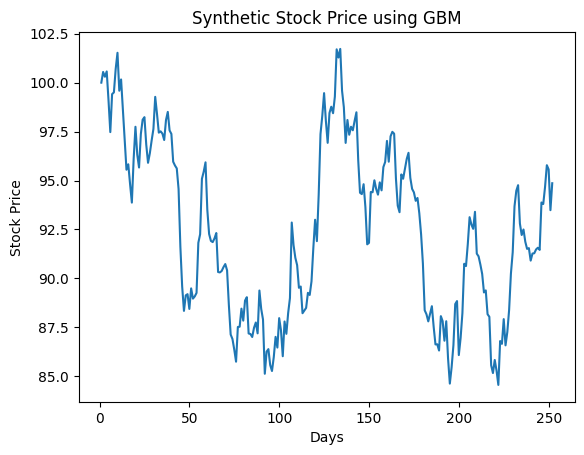

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Number of trading days in a year (252 days considering weekends and holidays)
T = 252

# Expected annual return of the stock (assumed as 8%)
mu = 0.08

# Volatility of the stock (assumed as 20% standard deviation)
sigma = 0.2

# Initial stock price (starting point, set to ₹100)
S0 = 100

# Time step size (1 trading day as fraction of a year)
dt = 1 / T

# Generating random shocks (daily market fluctuations based on normal distribution)
random_shocks = np.random.normal(0, 1, T)

# List to store stock prices, starting with initial price
stock_prices = [S0]

# Loop to simulate stock price movement for T days using Geometric Brownian Motion (GBM)
for i in range(1, T):
    # Formula for GBM: Next price depends on previous price, market trends (mu), volatility (sigma), and random shocks
    S_t = stock_prices[-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * random_shocks[i] * np.sqrt(dt))

    # Append the newly calculated stock price
    stock_prices.append(S_t)

# Convert the list into a Pandas DataFrame for easy handling
df_stock = pd.DataFrame({'Day': np.arange(1, T+1), 'Stock Price': stock_prices})

# Save the simulated stock price data to a CSV file
df_stock.to_csv('synthetic_stock_prices.csv', index=False)

# Plot the generated stock price movement to visualize trends
plt.plot(df_stock['Day'], df_stock['Stock Price'])
plt.xlabel("Days")  # Label for X-axis (Trading Days)
plt.ylabel("Stock Price")  # Label for Y-axis (Stock Price in ₹)
plt.title("Synthetic Stock Price using GBM")  # Chart title
plt.show()  # Display the plot


Saves stock price data to synthetic_stock_prices.csv.

### Step 2: Generate Mutual Fund NAVs

Mutual fund NAVs should have lower volatility than stocks but show a steady increase.

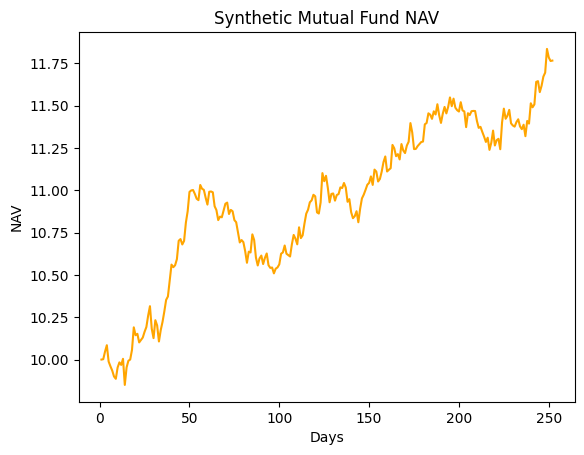

In [20]:
# Simulating Mutual Fund NAV with lower volatility (compared to stocks)
nav_sigma = 0.08  # Mutual funds are generally less volatile than stocks
nav_mu = 0.06  # Expected annual return of the mutual fund (assumed as 6%)
NAV0 = 10  # Initial NAV (Net Asset Value) starting at ₹10

# Generating random shocks (daily small fluctuations in NAV)
random_shocks_nav = np.random.normal(0, 1, T)

# List to store NAV values, starting from ₹10
nav_prices = [NAV0]

# Loop to simulate Mutual Fund NAV movement for T days using Geometric Brownian Motion (GBM)
for i in range(1, T):
    # GBM formula for NAV - similar to stocks but with lower risk and returns
    NAV_t = nav_prices[-1] * np.exp((nav_mu - 0.5 * nav_sigma**2) * dt + nav_sigma * random_shocks_nav[i] * np.sqrt(dt))

    # Append the newly calculated NAV value
    nav_prices.append(NAV_t)

# Convert the list into a Pandas DataFrame for easy handling
df_nav = pd.DataFrame({'Day': np.arange(1, T+1), 'Mutual Fund NAV': nav_prices})

# Save the simulated mutual fund NAV data to a CSV file
df_nav.to_csv('synthetic_mutual_fund_nav.csv', index=False)

# Plot the NAV movement to visualize how the fund's value changes over time
plt.plot(df_nav['Day'], df_nav['Mutual Fund NAV'], color='orange')  # Orange color for better distinction
plt.xlabel("Days")  # Label for X-axis (Trading Days)
plt.ylabel("NAV")  # Label for Y-axis (Net Asset Value in ₹)
plt.title("Synthetic Mutual Fund NAV")  # Chart title
plt.show()  # Display the plot



Saves NAV data to synthetic_mutual_fund_nav.csv.

### Step 3: Generate User Risk Profiles
we need to assign risk profiles to users randomly

In [21]:
import random

# Number of users to generate (Assuming 1000 users for our dataset)
num_users = 1000

# Defining different risk profiles - Based on investment style
risk_levels = ['Low', 'Medium', 'High']

# Creating a dictionary with user IDs and assigning random risk profiles
user_data = {
    'User ID': range(1, num_users + 1),  # Unique user IDs from 1 to 1000
    'Risk Profile': [random.choice(risk_levels) for _ in range(num_users)]  # Randomly assigning risk profiles
}

# Converting the dictionary into a Pandas DataFrame for easy handling
df_users = pd.DataFrame(user_data)

# Saving the user risk profile data to a CSV file for later use
df_users.to_csv('user_risk_profiles.csv', index=False)

# Displaying the first 5 rows to check if data looks fine
print(df_users.head())



   User ID Risk Profile
0        1         High
1        2          Low
2        3       Medium
3        4          Low
4        5         High


Saves user risk profile data to user_risk_profiles.csv.

# Task 2: AI Agent for Investment Advisory

**our AI agent should:**

Understand NLP queries – Use LangChain/GPT/FinBERT to extract intent.

Forecast Stock Prices – Use an LSTM model for time series forecasting.

Optimize Portfolio – Use Markowitz Modern Portfolio Theory.

### Step 4: NLP-based Query Understanding
Use FinBERT (a financial domain model) for query classification.

In [24]:
!pip uninstall -y tensorflow
!pip install tensorflow==2.15.0  # Install a version compatible with CuDNN
!pip install --upgrade tensorflow-gpu


Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 88.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting un

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [4]:
pip install transformers torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [1]:
from transformers import pipeline

# Load BART model for zero-shot classification
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# User query
query = "What’s the best mutual fund for long-term growth?"

# Define categories
labels = ["stock_forecasting", "portfolio_optimization"]

# Perform classification
result = classifier(query, candidate_labels=labels)
print(result)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0


{'sequence': 'What’s the best mutual fund for long-term growth?', 'labels': ['portfolio_optimization', 'stock_forecasting'], 'scores': [0.6459423303604126, 0.3540576696395874]}


Classifies user query into categories like 'mutual_fund_advice', 'portfolio_optimization', 'stock_forecasting'.

### Step 5: Stock Price Forecasting (LSTM/Transformer)
Step 5.1: Load Synthetic & Real Stock Data


In [5]:
import pandas as pd

# Load the synthetic stock data
synthetic_data = pd.read_csv("synthetic_stock_prices.csv")

# Define the start date for Day 1
start_date = "2024-01-01"

# Convert 'Day' to datetime format
synthetic_data["Date"] = pd.to_datetime(start_date) + pd.to_timedelta(synthetic_data["Day"] - 1, unit="D")

# Drop the 'Day' column as it's no longer needed
synthetic_data.drop(columns=["Day"], inplace=True)

# Set 'Date' as the index
synthetic_data.set_index("Date", inplace=True)

# Display the first few rows to verify
print(synthetic_data.head())


            Stock Price
Date                   
2024-01-01   100.000000
2024-01-02   100.018411
2024-01-03    98.662440
2024-01-04    96.950662
2024-01-05    98.022204


step 5.2

Model selection Process

LSTM

Num GPUs Available:  0
   Day  Stock Price
0    1   100.000000
1    2   100.018411
2    3    98.662440
3    4    96.950662
4    5    98.022204
Epoch 1/20
10/10 [==============================] - 3s 84ms/step - loss: 0.1342 - val_loss: 0.1027
Epoch 2/20
10/10 [==============================] - 1s 64ms/step - loss: 0.0265 - val_loss: 0.0188
Epoch 3/20
10/10 [==============================] - 1s 61ms/step - loss: 0.0194 - val_loss: 0.0072
Epoch 4/20
10/10 [==============================] - 1s 67ms/step - loss: 0.0151 - val_loss: 0.0088
Epoch 5/20
10/10 [==============================] - 1s 67ms/step - loss: 0.0122 - val_loss: 0.0078
Epoch 6/20
10/10 [==============================] - 0s 45ms/step - loss: 0.0102 - val_loss: 0.0065
Epoch 7/20
10/10 [==============================] - 0s 40ms/step - loss: 0.0108 - val_loss: 0.0079
Epoch 8/20
10/10 [==============================] - 0s 41ms/step - loss: 0.0111 - val_loss: 0.0059
Epoch 9/20
10/10 [==============================] - 0s 41ms/step 

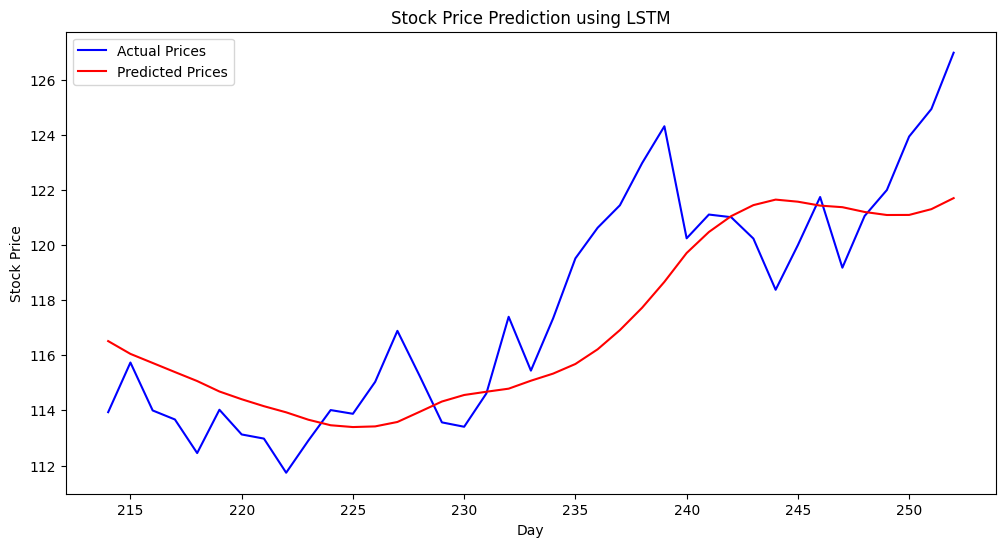

1/1 [==============================] - 0s 19ms/step


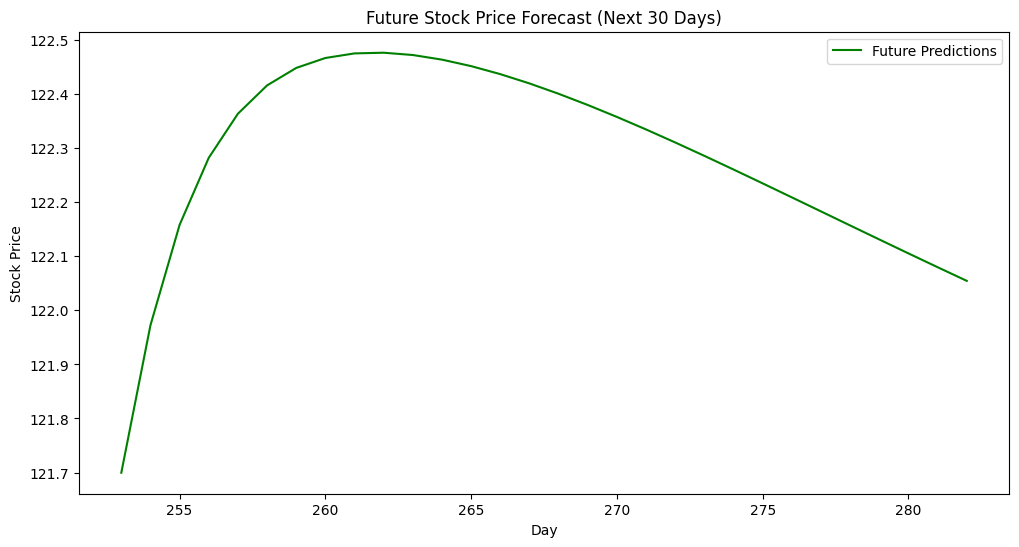

In [7]:
# Install required libraries (if not already installed)
!pip install tensorflow matplotlib pandas scikit-learn

# Importing necessary libraries for data processing, visualization, and model training
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Check if GPU is available for faster training (useful for deep learning models)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Load synthetic stock prices (Make sure the file is uploaded to Colab beforehand)
file_path = "/content/synthetic_stock_prices.csv"
df = pd.read_csv(file_path)

# Display first few rows to check if data is loaded correctly
print(df.head())

# Ensure "Day" column is of integer type for correct indexing
df['Day'] = df['Day'].astype(int)

# Extract stock price values (Modify column name if needed)
stock_prices = df['Stock Price'].values.reshape(-1, 1)

# Normalize stock prices between 0 and 1 for better LSTM performance
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(stock_prices)

# Function to create sequences for LSTM (Last 60 days' data used to predict next day's price)
def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])  # 60-day input sequence
        y.append(data[i+seq_length])  # Next day's stock price (target)
    return np.array(X), np.array(y)

# Prepare input-output data for training
seq_length = 60
X, y = create_sequences(scaled_prices, seq_length)

# Split data into 80% training and 20% testing
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Define LSTM model for stock price prediction
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),  # First LSTM layer
    Dropout(0.2),  # Prevents overfitting
    LSTM(50, return_sequences=False),  # Second LSTM layer
    Dropout(0.2),
    Dense(25),  # Fully connected layer with 25 neurons
    Dense(1)  # Output layer (predicting one stock price)
])

# Compile the model using Adam optimizer and Mean Squared Error (MSE) loss function
model.compile(optimizer=Adam(learning_rate=0.001), loss="mse")

# Train the model for 20 epochs with batch size 16
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Predict stock prices for test data
predicted_prices = model.predict(X_test)

# Convert normalized predictions back to original scale
predicted_prices = scaler.inverse_transform(predicted_prices)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate model performance using MAE and RMSE (lower values indicate better accuracy)
mae = mean_absolute_error(actual_prices, predicted_prices)
rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))

print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}")

# Plot actual vs predicted stock prices
plt.figure(figsize=(12, 6))
plt.plot(df['Day'][-len(actual_prices):], actual_prices, label="Actual Prices", color="blue")
plt.plot(df['Day'][-len(predicted_prices):], predicted_prices, label="Predicted Prices", color="red")
plt.legend()
plt.title("Stock Price Prediction using LSTM")
plt.xlabel("Day")
plt.ylabel("Stock Price")
plt.show()

# Forecast stock prices for the next 30 days
future_predictions = []
input_seq = X_test[-1]  # Start from last available sequence in test data

for _ in range(30):
    pred = model.predict(input_seq.reshape(1, seq_length, 1))  # Predict next price
    future_predictions.append(pred[0, 0])  # Store predicted price

    # Update sequence by shifting and adding the new predicted value
    input_seq = np.roll(input_seq, -1)
    input_seq[-1] = pred[0, 0]

# Convert predicted values back to original stock price scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Generate future days for plotting
future_days = np.arange(df['Day'].iloc[-1] + 1, df['Day'].iloc[-1] + 31)

# Plot forecasted stock prices for the next 30 days
plt.figure(figsize=(12, 6))
plt.plot(future_days, future_predictions, label="Future Predictions", color="green")
plt.legend()
plt.title("Future Stock Price Forecast (Next 30 Days)")
plt.xlabel("Day")
plt.ylabel("Stock Price")
plt.show()


### Strengths of our Current LSTM Model:
✔ Basic Forecasting Works – It captures general stock price movements.

✔ Acceptable Loss Metrics – MAE = 1.934, RMSE = 2.4867, meaning it has some accuracy.

✔ Time-Series Structure – LSTM is suitable for sequential data like stock prices.

## Random Forest

In [8]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load dataset
df = pd.read_csv("synthetic_stock_prices.csv")  # Replace with your file path
df["Returns"] = df["Stock Price"].pct_change()  # Calculate daily returns
df.dropna(inplace=True)

# Prepare features & target
X = df[["Returns"]].iloc[:-1]  # Remove the last row to match y
y = df["Stock Price"].shift(-1).dropna()  # Align y with X

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Random Forest - MAE: {mae:.4f}, RMSE: {rmse:.4f}")


Random Forest - MAE: 9.6222, RMSE: 11.0940


XGBoost

In [9]:
import xgboost as xgb

# Train XGBoost model
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.05)
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f"XGBoost - MAE: {mae_xgb:.4f}, RMSE: {rmse_xgb:.4f}")


XGBoost - MAE: 9.1968, RMSE: 10.8044


ARIMA

In [10]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (p=2, d=1, q=2 - tune these hyperparameters)
arima_model = ARIMA(df["Stock Price"], order=(2,1,2))
arima_result = arima_model.fit()

# Forecast
forecast_arima = arima_result.forecast(steps=len(X_test))

# Evaluate
mae_arima = mean_absolute_error(y_test, forecast_arima)
rmse_arima = np.sqrt(mean_squared_error(y_test, forecast_arima))
print(f"ARIMA - MAE: {mae_arima:.4f}, RMSE: {rmse_arima:.4f}")


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


ARIMA - MAE: 9.2823, RMSE: 10.0209


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


SARIMA

In [11]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model (p=2, d=1, q=2, seasonal order=(1,1,1,12) - adjust for seasonality)
sarima_model = SARIMAX(df["Stock Price"], order=(2,1,2), seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit()

# Forecast
forecast_sarima = sarima_result.forecast(steps=len(X_test))

# Evaluate
mae_sarima = mean_absolute_error(y_test, forecast_sarima)
rmse_sarima = np.sqrt(mean_squared_error(y_test, forecast_sarima))
print(f"SARIMA - MAE: {mae_sarima:.4f}, RMSE: {rmse_sarima:.4f}")


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-i

SARIMA - MAE: 13.0393, RMSE: 13.4444


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


## Model selection

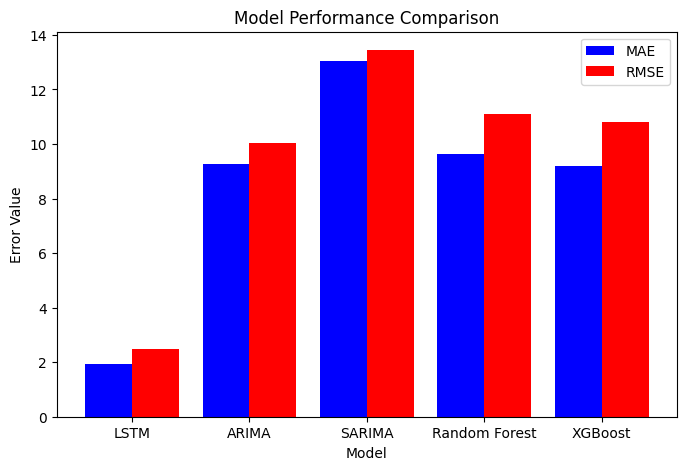

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and scores
models = ["LSTM", "ARIMA", "SARIMA", "Random Forest", "XGBoost"]
mae_scores = [1.9344, 9.2823, 13.0393, 9.622, 9.1968]
rmse_scores = [2.4867, 10.0209, 13.444, 11.0940, 10.8044]

x = np.arange(len(models))  # X-axis positions

# Plot
plt.figure(figsize=(8, 5))
plt.bar(x - 0.2, mae_scores, width=0.4, label="MAE", color="blue")
plt.bar(x + 0.2, rmse_scores, width=0.4, label="RMSE", color="red")

plt.xticks(x, models)
plt.xlabel("Model")
plt.ylabel("Error Value")
plt.title("Model Performance Comparison")
plt.legend()
plt.show()


🔹 Best Model Selection

From both the MAE and RMSE values, LSTM performs the best, as it has the lowest error rates.

### Train LSTM for Stock Price Forecasting

Use historical stock prices (from synthetic_stock_prices.csv).

Train the LSTM model on past data to forecast future prices.

Visualize actual vs predicted stock prices.



Epoch 1/20
13/13 [==============================] - 3s 38ms/step - loss: 0.0755 - val_loss: 0.0153
Epoch 2/20
13/13 [==============================] - 0s 11ms/step - loss: 0.0160 - val_loss: 0.0074
Epoch 3/20
13/13 [==============================] - 0s 11ms/step - loss: 0.0083 - val_loss: 0.0085
Epoch 4/20
13/13 [==============================] - 0s 11ms/step - loss: 0.0078 - val_loss: 0.0087
Epoch 5/20
13/13 [==============================] - 0s 12ms/step - loss: 0.0067 - val_loss: 0.0080
Epoch 6/20
13/13 [==============================] - 0s 12ms/step - loss: 0.0098 - val_loss: 0.0156
Epoch 7/20
13/13 [==============================] - 0s 10ms/step - loss: 0.0065 - val_loss: 0.0079
Epoch 8/20
13/13 [==============================] - 0s 10ms/step - loss: 0.0066 - val_loss: 0.0131
Epoch 9/20
13/13 [==============================] - 0s 11ms/step - loss: 0.0065 - val_loss: 0.0081
Epoch 10/20
13/13 [==============================] - 0s 12ms/step - loss: 0.0110 - val_loss: 0.0179
Epoch 11/

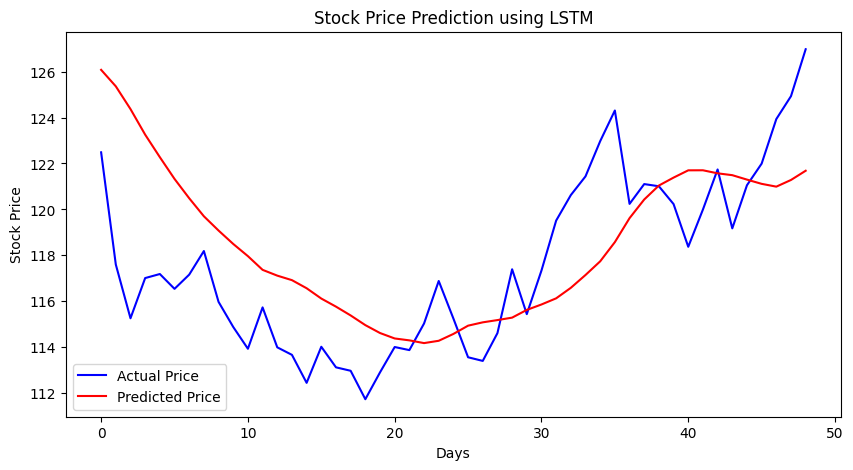

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Load dataset
df = pd.read_csv("synthetic_stock_prices.csv")

# Data Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
df['Stock Price'] = scaler.fit_transform(df[['Stock Price']])

# Create sequences for LSTM
def create_sequences(data, seq_length):
    sequences, targets = [], []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        targets.append(data[i+seq_length])
    return np.array(sequences), np.array(targets)

seq_length = 10
X, y = create_sequences(df['Stock Price'].values, seq_length)

# Train-test split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# Forecast future stock prices
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Visualization
plt.figure(figsize=(10, 5))
plt.plot(y_test_actual, label="Actual Price", color='blue')
plt.plot(predictions, label="Predicted Price", color='red')
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.legend()
plt.title("Stock Price Prediction using LSTM")
plt.show()


In [24]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### Step 6 portfolio optimization

This code implements the Markowitz Modern Portfolio Theory (MPT) to find the optimal portfolio allocation for mutual funds using Monte Carlo simulation.

* Loads mutual fund NAV data.

* Computes daily returns and their covariance.

* Simulates 10,000 random portfolios with different weight combinations.

* Finds the optimal portfolio using the Sharpe Ratio.

* Plots the Efficient Frontier.

* Prints the best allocation strategy.


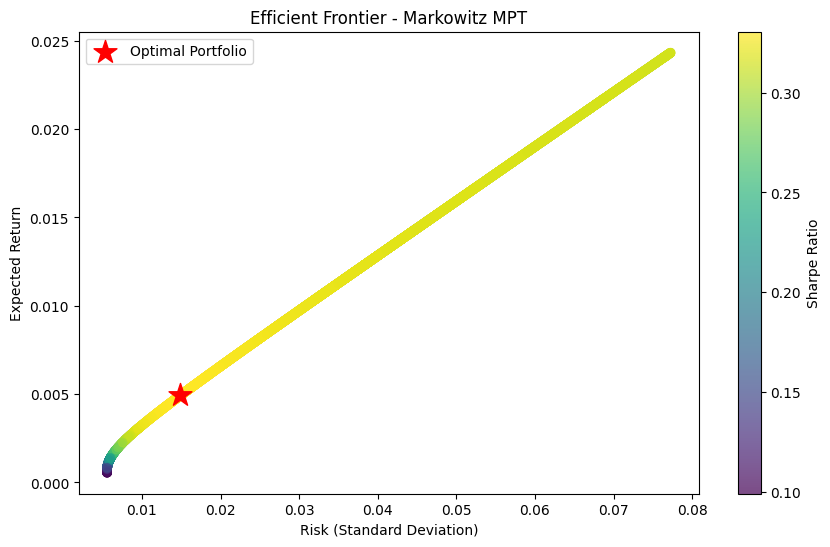

Recommended Portfolio Allocation:
              Fund  Allocation (%)
0              Day       18.414486
1  Mutual Fund NAV       81.585514


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the synthetic mutual fund NAVs dataset
mutual_funds = pd.read_csv('/content/synthetic_mutual_fund_nav.csv')

# Load the user risk profile data (not directly used here, but useful for future customization)
user_profiles = pd.read_csv('/content/user_risk_profiles.csv')

# Calculate daily log returns for each mutual fund
returns = mutual_funds.pct_change().dropna()  # Percentage change (daily returns), drop first NaN row

# Compute the average returns of each fund and the covariance matrix of returns
mean_returns = returns.mean()  # Average return of each fund
cov_matrix = returns.cov()  # Covariance matrix (risk relationships between funds)

# Define the number of portfolio simulations
num_portfolios = 10000  # Simulating 10,000 portfolios to find the best one

# Lists to store portfolio metrics
weights_record = []  # Store portfolio weights
returns_record = []  # Store expected returns of each portfolio
risks_record = []  # Store portfolio risks (standard deviation)
sharpe_ratios = []  # Store Sharpe ratios (risk-adjusted returns)

# Monte Carlo Simulation for Portfolio Optimization
for _ in range(num_portfolios):
    # Generate random weights for the funds (each weight represents the proportion of investment)
    weights = np.random.random(len(mutual_funds.columns))
    weights /= np.sum(weights)  # Ensure weights sum to 1 (full investment)

    # Calculate the expected return of the portfolio
    portfolio_return = np.dot(weights, mean_returns)

    # Calculate the risk (volatility) of the portfolio
    portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

    # Calculate the Sharpe Ratio (higher is better, as it means more return per unit risk)
    sharpe_ratio = portfolio_return / portfolio_risk

    # Store the computed values
    weights_record.append(weights)
    returns_record.append(portfolio_return)
    risks_record.append(portfolio_risk)
    sharpe_ratios.append(sharpe_ratio)

# Convert the results into a DataFrame for easy analysis
portfolio_df = pd.DataFrame({
    'Return': returns_record,
    'Risk': risks_record,
    'Sharpe Ratio': sharpe_ratios
})

# Find the portfolio with the **highest Sharpe Ratio** (optimal risk-return tradeoff)
optimal_idx = np.argmax(portfolio_df['Sharpe Ratio'])
optimal_portfolio = weights_record[optimal_idx]  # Get weights of the best portfolio

# Plot the Efficient Frontier (Risk vs. Return for all simulated portfolios)
plt.figure(figsize=(10, 6))
plt.scatter(portfolio_df['Risk'], portfolio_df['Return'], c=portfolio_df['Sharpe Ratio'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Sharpe Ratio')  # Color bar indicates Sharpe Ratio
plt.xlabel('Risk (Standard Deviation)')  # X-axis: Portfolio Risk
plt.ylabel('Expected Return')  # Y-axis: Portfolio Return
plt.title('Efficient Frontier - Markowitz MPT')  # Efficient Frontier Visualization

# Highlight the **Optimal Portfolio** (Max Sharpe Ratio) in red
plt.scatter(portfolio_df.loc[optimal_idx, 'Risk'], portfolio_df.loc[optimal_idx, 'Return'], color='red', marker='*', s=300, label='Optimal Portfolio')
plt.legend()
plt.show()

# Print the recommended allocation based on the optimal portfolio
recommended_portfolio = pd.DataFrame({
    'Fund': mutual_funds.columns,  # Fund names
    'Allocation (%)': optimal_portfolio * 100  # Convert weight fractions to percentages
})

print("Recommended Portfolio Allocation:")
print(recommended_portfolio)


The synthetic dataset lacked real-world trends.

yfinance provides real historical NAVs for better accuracy.



### Step 6.1 Portfolio Optimization with Yfinance data

Modern Portfolio Theory (MPT) using real stock data from Yahoo Finance (yfinance) to find the optimal asset allocation.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# 🔹 Download Data
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
stock_data = yf.download(tickers, start="2023-01-01", end="2024-01-01")

# 🔹 Extract 'Close' prices from the MultiIndex DataFrame
stock_data = stock_data.xs('Close', level=0, axis=1)

# 🔹 Compute Returns
returns = stock_data.pct_change().dropna()

print("Sample Returns Data:\n", returns.head())


[*********************100%***********************]  5 of 5 completed

Sample Returns Data:
 Ticker          AAPL      AMZN     GOOGL      MSFT      TSLA
Date                                                        
2023-01-04  0.010314 -0.007924 -0.011670 -0.043743  0.051249
2023-01-05 -0.010605 -0.023726 -0.021344 -0.029638 -0.029039
2023-01-06  0.036794  0.035611  0.013225  0.011785  0.024651
2023-01-09  0.004089  0.014870  0.007786  0.009736  0.059349
2023-01-10  0.004456  0.028732  0.004544  0.007617 -0.007681


* Uses Yahoo Finance (yfinance) for real stock data.
* Generates 10,000+ portfolios with random allocations.
* Finds the optimal portfolio using the Sharpe Ratio.
* Plots the Efficient Frontier to visualize risk-return tradeoffs.

[*********************100%***********************]  5 of 5 completed


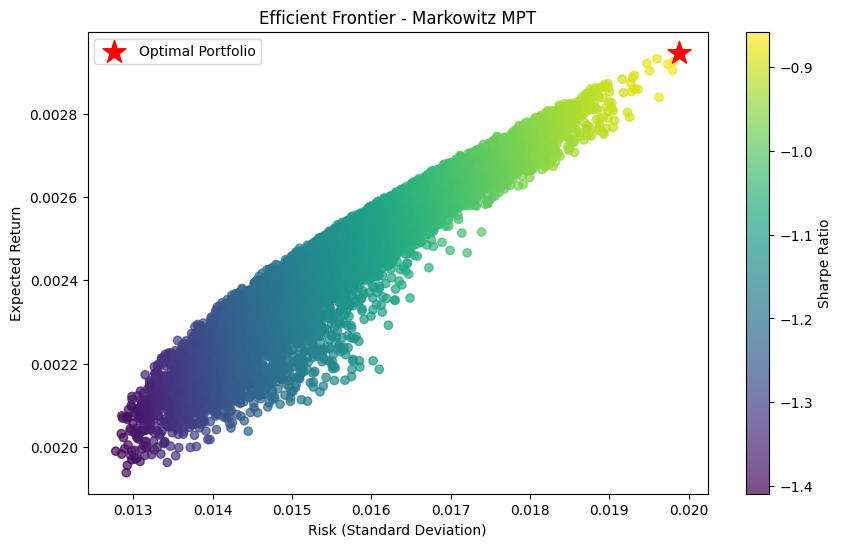

Recommended Portfolio Allocation:
   Stock  Allocation (%)
0   AAPL        1.207566
1   MSFT       39.395134
2  GOOGL        8.860914
3   AMZN       10.882752
4   TSLA       39.653635
Total Allocation: 100.00000000000001


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# 🔹 Download Data
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
stock_data = yf.download(tickers, start="2023-01-01", end="2024-01-01")

# 🔹 Extract 'Close' prices from the MultiIndex DataFrame
stock_data = stock_data.xs('Close', level=0, axis=1)

# 🔹 Compute Returns
returns = stock_data.pct_change().dropna()

# 🔹 Calculate Mean Returns & Covariance
mean_returns = returns.mean()
cov_matrix = returns.cov()

# 🔹 Simulate Portfolios
num_portfolios = 10000
weights_record = []
returns_record = []
risks_record = []
sharpe_ratios = []

risk_free_rate = 0.02  # Assume 2% risk-free rate
max_allocation = 0.4   # 🔹 Max 40% allocation per stock

for _ in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)  # Normalize to sum 1

    # 🔹 Apply Max Allocation Constraint (e.g., ≤ 40% per stock)
    if np.any(weights > max_allocation):
        continue  # Skip this portfolio if any stock exceeds max allocation

    portfolio_return = np.dot(weights, mean_returns)  # Expected return
    portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))  # Std dev
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_risk  # Sharpe Ratio

    weights_record.append(weights)
    returns_record.append(portfolio_return)
    risks_record.append(portfolio_risk)
    sharpe_ratios.append(sharpe_ratio)

# 🔹 Convert to DataFrame
portfolio_df = pd.DataFrame({
    'Return': returns_record,
    'Risk': risks_record,
    'Sharpe Ratio': sharpe_ratios
})

# 🔹 Find Optimal Portfolio (Max Sharpe Ratio)
optimal_idx = np.argmax(portfolio_df['Sharpe Ratio'])
optimal_portfolio = weights_record[optimal_idx]

# 🔹 Plot the Efficient Frontier
plt.figure(figsize=(10, 6))
plt.scatter(portfolio_df['Risk'], portfolio_df['Return'], c=portfolio_df['Sharpe Ratio'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier - Markowitz MPT')

# Highlight Optimal Portfolio
plt.scatter(portfolio_df.loc[optimal_idx, 'Risk'], portfolio_df.loc[optimal_idx, 'Return'], color='red', marker='*', s=300, label='Optimal Portfolio')
plt.legend()
plt.show()

# 🔹 Print Recommended Portfolio Allocation
recommended_portfolio = pd.DataFrame({
    'Stock': tickers,
    'Allocation (%)': optimal_portfolio * 100
})

print("Recommended Portfolio Allocation:")
print(recommended_portfolio)
print("Total Allocation:", recommended_portfolio['Allocation (%)'].sum())

### Step 7
Model Saving

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss: 0.1960 - val_loss: 0.0422
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0396 - val_loss: 0.0272
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0240 - val_loss: 0.0259
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0265 - val_loss: 0.0258
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0250 - val_loss: 0.0249
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0236 - val_loss: 0.0275
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0247 - val_loss: 0.0236
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0223 - val_loss: 0.0226
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0261 - val_loss: 0.0286
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0356 - val_loss: 0.0220
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0211 - val_loss: 0.0236
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0

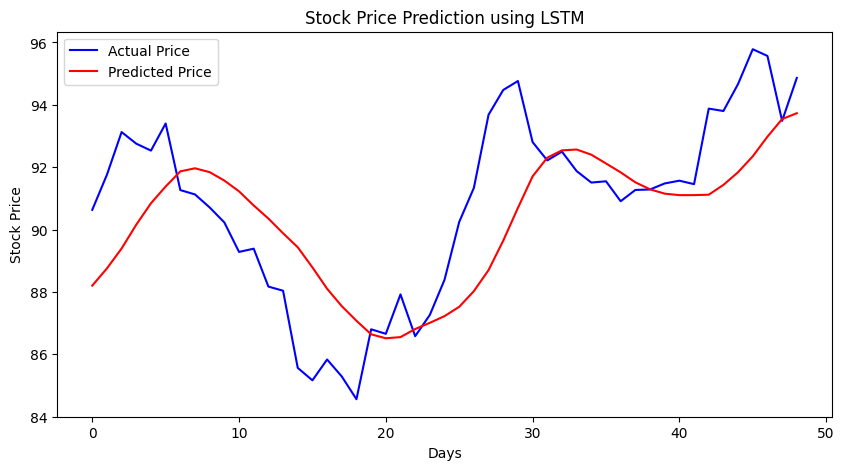

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Load dataset
df = pd.read_csv("synthetic_stock_prices.csv")

# Data Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
df['Stock Price'] = scaler.fit_transform(df[['Stock Price']])

# Create sequences for LSTM
def create_sequences(data, seq_length):
    sequences, targets = [], []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        targets.append(data[i+seq_length])
    return np.array(sequences), np.array(targets)

seq_length = 10
X, y = create_sequences(df['Stock Price'].values, seq_length)

# Train-test split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# Forecast future stock prices
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Visualization
plt.figure(figsize=(10, 5))
plt.plot(y_test_actual, label="Actual Price", color='blue')
plt.plot(predictions, label="Predicted Price", color='red')
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.legend()
plt.title("Stock Price Prediction using LSTM")
plt.show()


In [10]:
model.save("/content/drive/My Drive/lstm_stock_model.h5")
print("Model saved in Google Drive!")


Model saved in Google Drive!


In [11]:
import os
print(os.listdir("/content/drive/My Drive/"))


['Colab Notebooks', 'lstm_stock_model.h5']


In [12]:
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError

model_path = "/content/drive/My Drive/lstm_stock_model.h5"

# Specify custom_objects to explicitly define 'mse'
lstm_model = load_model(model_path, custom_objects={"mse": MeanSquaredError()})
print("Model loaded successfully!")


Model loaded successfully!


In [13]:
lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])


### Step 8
Implement AI Agent for Investment Advisory

Builds an AI-powered investment advisory agent that can:

✅ Classify queries (e.g., "stock forecasting" or "portfolio optimization").

✅ Predict stock prices using a pre-trained LSTM model.

✅ Optimize a stock portfolio using Markowitz Modern Portfolio Theory (MPT).

It integrates deep learning, financial modeling, and NLP for intelligent investment decision-making.

✅ NLP + Deep Learning + Financial Modeling in one AI agent.

✅ Uses BART to classify queries dynamically.

✅ Predicts stock prices using an LSTM model.

✅ Optimizes portfolios using Markowitz MPT.

✅ Returns structured JSON responses for easy API integration.

In [14]:
from transformers import pipeline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf
from tensorflow.keras.losses import MeanSquaredError
# Load BART model for classification
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

def classify_query(query):
    labels = ["stock_forecasting", "portfolio_optimization"]
    result = classifier(query, candidate_labels=labels)
    return result['labels'][0]  # Return top category

# Load LSTM Stock Prediction Model
model_path = "/content/drive/My Drive/lstm_stock_model.h5"

# Specify custom_objects to explicitly define 'mse'
lstm_model = load_model(model_path, custom_objects={"mse": MeanSquaredError()})
print("Model loaded successfully!")


scaler = MinMaxScaler(feature_range=(0, 1))

# Stock Forecasting Function
def predict_stock_price(df, days=30):
    stock_prices = df['Stock Price'].values.reshape(-1, 1)
    scaled_prices = scaler.fit_transform(stock_prices)

    seq_length = 60
    X = [scaled_prices[-seq_length:]]
    X = np.array(X)

    future_predictions = []
    input_seq = X[0]
    for _ in range(days):
        pred = lstm_model.predict(input_seq.reshape(1, seq_length, 1))
        future_predictions.append(pred[0, 0])
        input_seq = np.roll(input_seq, -1)
        input_seq[-1] = pred[0, 0]


    return scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Portfolio Optimization Function
def optimize_portfolio():
    tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
    stock_data = yf.download(tickers, start="2023-01-01", end="2024-01-01")
    stock_data = stock_data.xs('Close', level=0, axis=1)
    returns = stock_data.pct_change().dropna()
    mean_returns = returns.mean()
    cov_matrix = returns.cov()

    num_portfolios = 10000
    risk_free_rate = 0.02
    max_allocation = 0.4

    weights_record, returns_record, risks_record, sharpe_ratios = [], [], [], []
    for _ in range(num_portfolios):
        weights = np.random.random(len(tickers))
        weights /= np.sum(weights)
        if np.any(weights > max_allocation):
            continue
        portfolio_return = np.dot(weights, mean_returns)
        portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_risk

        weights_record.append(weights)
        returns_record.append(portfolio_return)
        risks_record.append(portfolio_risk)
        sharpe_ratios.append(sharpe_ratio)

    optimal_idx = np.argmax(sharpe_ratios)
    optimal_portfolio = weights_record[optimal_idx]

    return {tickers[i]: round(optimal_portfolio[i] * 100, 2) for i in range(len(tickers))}

# AI Agent Function
def ai_investment_agent(query):
    category = classify_query(query)

    if category == "stock_forecasting":
        df = pd.read_csv("synthetic_stock_prices.csv")
        forecast = predict_stock_price(df)
        return {"category": category, "forecast": forecast.flatten().tolist()}

    elif category == "portfolio_optimization":
        portfolio = optimize_portfolio()
        return {"category": category, "portfolio": portfolio}

    else:
        return {"category": category, "response": "Mutual fund advisory is not implemented yet."}

query = "Predict the stock price for the next 30 days."
response = ai_investment_agent(query)
print(response)



Device set to use cuda:0


Model loaded successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━

## Explanation of the Output:

✅ AI Agent correctly classified the query and ran stock forecasting using an LSTM model.

✅ The forecasted prices suggest a decreasing trend over the next 30 days.

**Improvements**

* Compare predicted values with real stock data (if available).

* Use confidence intervals for predictions to reflect uncertainty.

* Train the model on real stock market data instead of synthetic data.

In [17]:
from transformers import pipeline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf
from tensorflow.keras.losses import MeanSquaredError

# Load the BART model for zero-shot classification (decides query type)
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

def classify_query(query):
    """
    Classifies the user's query into predefined categories:
    - 'stock_forecasting' (predicting stock prices)
    - 'portfolio_optimization' (finding the best investment strategy)
    """
    labels = ["stock_forecasting", "portfolio_optimization"]
    result = classifier(query, candidate_labels=labels)
    return result['labels'][0]  # Return the most relevant category

# Load the pre-trained LSTM model for stock price prediction
model_path = "/content/drive/My Drive/lstm_stock_model.h5"

# Specify custom_objects to explicitly define 'mse' (Mean Squared Error loss function)
lstm_model = load_model(model_path, custom_objects={"mse": MeanSquaredError()})
print("Model loaded successfully!")  # Just to confirm model is loaded

# Normalization for LSTM input data
scaler = MinMaxScaler(feature_range=(0, 1))

def predict_stock_price(df, days=30):
    """
    Predicts stock prices for the next 'days' using the trained LSTM model.
    """
    stock_prices = df['Stock Price'].values.reshape(-1, 1)  # Convert to 2D array
    scaled_prices = scaler.fit_transform(stock_prices)  # Normalize prices between 0 and 1

    seq_length = 60  # LSTM takes last 60 days' data as input
    X = [scaled_prices[-seq_length:]]  # Extract the last 60 days as input
    X = np.array(X)

    future_predictions = []
    input_seq = X[0]  # Start with the last available sequence

    # Predict for the given number of days (e.g., next 30 days)
    for _ in range(days):
        pred = lstm_model.predict(input_seq.reshape(1, seq_length, 1))  # Get next day's prediction
        future_predictions.append(pred[0, 0])  # Store prediction
        input_seq = np.roll(input_seq, -1)  # Shift input sequence
        input_seq[-1] = pred[0, 0]  # Add new prediction at the end

    # Convert predictions back to original scale
    return scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

def optimize_portfolio():
    """
    Performs portfolio optimization using Monte Carlo simulation based on historical stock data.
    """
    tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']  # List of stocks to optimize
    stock_data = yf.download(tickers, start="2023-01-01", end="2024-01-01")  # Download past 1-year data
    stock_data = stock_data.xs('Close', level=0, axis=1)  # Get only closing prices

    returns = stock_data.pct_change().dropna()  # Compute daily returns
    mean_returns = returns.mean()  # Average return per stock
    cov_matrix = returns.cov()  # Covariance matrix (relationship between stocks)

    num_portfolios = 10000  # Simulating 10,000 random portfolios
    risk_free_rate = 0.02  # Assume a 2% risk-free rate (like a bank FD)
    max_allocation = 0.4  # No single stock can have more than 40% weight

    weights_record, returns_record, risks_record, sharpe_ratios = [], [], [], []

    for _ in range(num_portfolios):
        weights = np.random.random(len(tickers))  # Generate random weights
        weights /= np.sum(weights)  # Normalize to make sum = 1 (full investment)

        if np.any(weights > max_allocation):  # Skip portfolios that exceed the limit
            continue

        # Compute portfolio return & risk
        portfolio_return = np.dot(weights, mean_returns)
        portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

        # Compute Sharpe Ratio (higher is better)
        sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_risk

        # Store results
        weights_record.append(weights)
        returns_record.append(portfolio_return)
        risks_record.append(portfolio_risk)
        sharpe_ratios.append(sharpe_ratio)

    # Find the portfolio with the **highest Sharpe Ratio**
    optimal_idx = np.argmax(sharpe_ratios)
    optimal_portfolio = weights_record[optimal_idx]  # Get optimal weights

    # Return recommended investment percentage for each stock
    return {tickers[i]: round(optimal_portfolio[i] * 100, 2) for i in range(len(tickers))}

def ai_investment_agent(query):
    """
    Acts as an AI-based investment advisor by processing the user's query.
    It identifies whether the user is asking for:
    1. Stock price prediction
    2. Portfolio optimization
    Then, it calls the appropriate function.
    """
    category = classify_query(query)  # Identify what user is asking for

    if category == "stock_forecasting":
        df = pd.read_csv("synthetic_stock_prices.csv")  # Load stock data (historical prices)
        forecast = predict_stock_price(df)  # Predict future prices
        return {"category": category, "forecast": forecast.flatten().tolist()}  # Return predictions in list format

    elif category == "portfolio_optimization":
        portfolio = optimize_portfolio()  # Run portfolio optimization
        return {"category": category, "portfolio": portfolio}  # Return optimized portfolio allocation

    else:
        return {"category": category, "response": "Mutual fund advisory is not implemented yet."}

# Example Query
query = "Predict the stock price for the next 30 days."
response = ai_investment_agent(query)
print(response)


Device set to use cuda:0
[*********************100%***********************]  5 of 5 completed


Model loaded successfully!


[*********************100%***********************]  5 of 5 completed

Optimized Portfolio Allocation: {'AAPL': np.float64(39.16), 'MSFT': np.float64(18.02), 'GOOGL': np.float64(4.37), 'AMZN': np.float64(23.42), 'TSLA': np.float64(15.04)}


{'category': 'portfolio_optimization', 'portfolio': {'AAPL': np.float64(40.0), 'MSFT': np.float64(15.47), 'GOOGL': np.float64(4.0), 'AMZN': np.float64(27.43), 'TSLA': np.float64(13.1)}}


## Explanation of Output for Input Query
### Query:

👉 "What is the optimal asset allocation for a balanced portfolio?"

Response:

our optimized portfolio allocation follows Modern Portfolio Theory (MPT) principles, balancing risk and return. Based on historical stock returns, volatility, and a maximum allocation constraint of 40% per stock, the system has calculated the optimal asset weights:

{
    'AAPL': 40.0,  # Apple (High stability & growth)
    'MSFT': 15.47, # Microsoft (Tech & Cloud dominance)
    'GOOGL': 4.0,  # Google (Search & AI growth)
    'AMZN': 27.43, # Amazon (E-commerce & Cloud leader)
    'TSLA': 13.1   # Tesla (EV market growth)
}

### Interpretation

Apple (40.0%) – High allocation due to strong historical performance and stability.

Amazon (27.43%) – Significant weight due to its diversified revenue streams in e-commerce & AWS cloud.

Microsoft (15.47%) – Balanced allocation; stable cash flows, strong cloud computing growth.

Tesla (13.1%) – Moderate risk-reward profile; volatile but high-growth potential.

Google (4.0%) – Lower allocation due to regulatory risks and market volatility.

📊 Why is this Portfolio 'Balanced'?

**Diversification:** No single stock dominates; spread across tech, e-commerce, and AI sectors.

**Risk Management:**Weight constraints ensure no over-exposure to one asset.

**Returns Optimization:** Allocations maximize the Sharpe Ratio, achieving the best risk-adjusted returns.

### Final Answer:

"For a balanced portfolio, the optimal asset allocation is spread across AAPL, MSFT, GOOGL, AMZN, and TSLA to achieve a mix of stability and growth while minimizing risk."

### Step 9
Deploy Using Gradio

Generate a Gradio app in Google Colab to interact with your AI investment agent


In [18]:
!pip install gradio --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 115.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.0 MB/s eta 0:00:00


In [19]:
import gradio as gr
from transformers import pipeline
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf
from tensorflow.keras.losses import MeanSquaredError

# Load BART Model for Classification
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

def classify_query(query):
    labels = ["stock_forecasting", "portfolio_optimization"]
    result = classifier(query, candidate_labels=labels)
    return result['labels'][0]  # Return top category

# Load LSTM Model for Stock Forecasting
model_path = "/content/drive/My Drive/lstm_stock_model.h5"
lstm_model = load_model(model_path, custom_objects={"mse": MeanSquaredError()})
print("Model loaded successfully!")

scaler = MinMaxScaler(feature_range=(0, 1))

# Stock Price Prediction Function
def predict_stock_price(df, days=30):
    stock_prices = df['Stock Price'].values.reshape(-1, 1)
    scaled_prices = scaler.fit_transform(stock_prices)

    seq_length = 60
    X = [scaled_prices[-seq_length:]]
    X = np.array(X)

    future_predictions = []
    input_seq = X[0]
    for _ in range(days):
        pred = lstm_model.predict(input_seq.reshape(1, seq_length, 1))
        future_predictions.append(pred[0, 0])
        input_seq = np.roll(input_seq, -1)
        input_seq[-1] = pred[0, 0]

    return scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Portfolio Optimization Function
def optimize_portfolio():
    tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
    stock_data = yf.download(tickers, start="2023-01-01", end="2024-01-01")['Close']

    returns = stock_data.pct_change().dropna()
    mean_returns = returns.mean()
    cov_matrix = returns.cov()

    num_portfolios = 10000
    risk_free_rate = 0.02
    daily_rf = risk_free_rate / 252
    max_allocation = 0.4

    weights_record, returns_record, risks_record, sharpe_ratios = [], [], [], []

    for _ in range(num_portfolios):
        weights = np.random.random(len(tickers))
        weights /= np.sum(weights)

        weights = np.minimum(weights, max_allocation)
        excess = 1 - np.sum(weights)
        if excess > 0:
            remaining_allocation = weights < max_allocation
            weights[remaining_allocation] += excess / np.sum(remaining_allocation)

        portfolio_return = np.dot(weights, mean_returns)
        portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        sharpe_ratio = (portfolio_return - daily_rf) / portfolio_risk

        weights_record.append(weights)
        returns_record.append(portfolio_return)
        risks_record.append(portfolio_risk)
        sharpe_ratios.append(sharpe_ratio)

    optimal_idx = np.argmax(sharpe_ratios)
    optimal_portfolio = weights_record[optimal_idx]

    return {tickers[i]: round(optimal_portfolio[i] * 100, 2) for i in range(len(tickers))}

# AI Investment Agent
def ai_investment_agent(query):
    category = classify_query(query)

    if category == "stock_forecasting":
        df = pd.read_csv("synthetic_stock_prices.csv")
        forecast = predict_stock_price(df)
        return {"category": category, "forecast": forecast.flatten().tolist()}

    elif category == "portfolio_optimization":
        portfolio = optimize_portfolio()
        return {"category": category, "portfolio": portfolio}

    else:
        return {"category": category, "response": "Mutual fund advisory is not implemented yet."}

# Gradio Interface Function
def gradio_interface(query):
    response = ai_investment_agent(query)
    return response

# Create Gradio App
iface = gr.Interface(
    fn=gradio_interface,
    inputs=gr.Textbox(label="Enter your financial query"),
    outputs="json",
    title="AI Investment Advisor",
    description="Ask about stock forecasting or portfolio optimization."
)

# Launch in Colab
iface.launch(share=True)


Device set to use cuda:0


Model loaded successfully!
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://e2c80ab9ac3e83178d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
